In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
from tradingcore.execution_manager import ExecutionManager
from tradingcore.campaign import Campaign
from tradingcore.account import Account
from tradingcore.moneymanagement import PlainMM

from exobuilder.data.datasource_mongo import DataSourceMongo
from exobuilder.data.datasource_sql import DataSourceSQL
from exobuilder.data.assetindex_mongo import AssetIndexMongo
from exobuilder.data.exostorage import EXOStorage

import pprint

In [3]:
try:
    from .settings import *
except SystemError:
    from scripts.settings import *

try:
    from .settings_local import *
except SystemError:
    try:
        from scripts.settings_local import *
    except ImportError:
        pass
    pass

In [4]:
assetindex = AssetIndexMongo(MONGO_CONNSTR, MONGO_EXO_DB)
storage = EXOStorage(MONGO_CONNSTR, MONGO_EXO_DB)
#datasource = DataSourceSQL(SQL_HOST, SQL_USER, SQL_PASS, assetindex, futures_limit=10, options_limit=10)
datasource = DataSourceMongo(MONGO_CONNSTR, MONGO_EXO_DB, assetindex, futures_limit=10, options_limit=10, exostorage=storage)


In [5]:
exmgr = ExecutionManager(MONGO_CONNSTR, datasource, dbname=MONGO_EXO_DB)

In [6]:
campaigns = exmgr.campaign_load_all()
accounts = exmgr.account_load_all()
pp = pprint.PrettyPrinter(indent=4)

## List of available campaigns

In [7]:
[print(x) for x in campaigns.keys()];

test_campaign


In [8]:
swm_info = storage.swarms_info()
pp.pprint(swm_info)

{   '_id': None,
    'alphas': ['MACross', 'RenkoPatterns_no_exit_on_patterns', 'SwingPoint'],
    'exo_types': ['CallSpread'],
    'instruments': ['ES']}


# Alphas list

In [9]:
instruments_filter = ['*']  # Select ALL
#instruments_filter = ['ES', 'CL']

exo_filter = ['*'] # Select ALL
#exo_filter = ['BullishCollar']

direction_filter = [0, -1, 1] # Select ALL
#direction_filter = [1]

alpha_filter = ['*']  # Select ALL
#alpha_filter = ['MaCross', 'PointAndFigurePatterns']

swmdf, swm_data = storage.swarms_list(instruments_filter, direction_filter, alpha_filter, exo_filter)

[print(s) for s in sorted(swmdf.columns)];

ES_CallSpread_Long_MACross
ES_CallSpread_Long_SwingPoint
ES_CallSpread_Short_MACross
ES_CallSpread_Short_RenkoPatterns_no_exit_on_patterns
ES_CallSpread_Short_SwingPoint


In [10]:
passive_exo = {}

exo_filter = '*'     # All 
#exo_filter = 'ES_'  # ES only
exo_filter = 'ES*Collar'  # ES Collars (incl Bearish, Bullish, BW and vanilla)


print('==== Passive EXO list')
for exo_name in storage.exo_list(exo_filter):
    passive_exo[exo_name], exo_dict = storage.load_series(exo_name)

for exo in sorted(passive_exo.keys()):
    print(exo)
    
print('==== Alphas EXO list')
[print(s) for s in sorted(swmdf.columns)];

==== Passive EXO list
ES_BearishCollarBW
ES_BullishCollarBW
==== Alphas EXO list
ES_CallSpread_Long_MACross
ES_CallSpread_Long_SwingPoint
ES_CallSpread_Short_MACross
ES_CallSpread_Short_RenkoPatterns_no_exit_on_patterns
ES_CallSpread_Short_SwingPoint


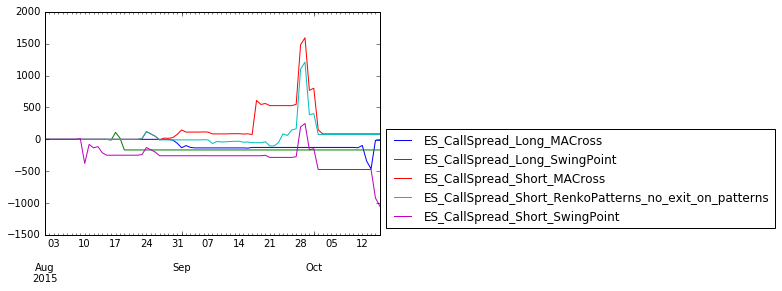

In [11]:
swmdf.plot().legend(loc='best', bbox_to_anchor=(1, 0.5));

# Campaign composition

In [12]:
 campaign_dict = {
            'name': 'test_campaign',
            'description': 'Brief description of campaign',
            'alphas': {
                'ES_CallSpread_Long_MACross': {
                    'qty': -1.0,
                    'leg_name': 'leg1',
                },
                'ES_BearishCollarBW': {
                    'qty': -2.0,
                },
                'ES_CallSpread_Short_SwingPoint': {
                    'qty': 2.0,
                    'leg_name': 'leg2',
                },
            }
        }

In [13]:
cmp = Campaign(campaign_dict, datasource)

### Save campaign

In [24]:
exmgr.campaign_save(cmp)

## Campaign positions

### Alphas positions

In [25]:
pp.pprint(cmp.alphas_positions)

{   'ES_CallSpread_Long_MACross': {   'exo_name': 'ES_CallSpread',
                                      'exposure': -0.0,
                                      'prev_exposure': -0.0},
    'ES_CallSpread_Short_SwingPoint': {   'exo_name': 'ES_CallSpread',
                                          'exposure': -2.0,
                                          'prev_exposure': -2.0}}


### EXO net positions

In [26]:
pp.pprint(cmp.exo_positions)

{'ES_CallSpread': {'exposure': -2.0, 'prev_exposure': -2.0}}


### Contracts positions

In [27]:
pp.pprint(cmp.positions)

{   'C.US.EPZ1519700': {   'asset': {   '_id': ObjectId('577a585f4b01f47f84d219b0'),
                                        '_type': 'opt',
                                        'callorput': 'C',
                                        'cqgsymbol': 'C.US.EPZ1519700',
                                        'expirationdate': datetime.datetime(2015, 12, 18, 0, 0),
                                        'idcontract': 5265,
                                        'idinstrument': 11,
                                        'idoption': 11643921,
                                        'name': 'C.US.EPZ1519700',
                                        'optionmonth': 'Z',
                                        'optionmonthint': 12,
                                        'optionname': 'C.US.EPZ1519700',
                                        'optionyear': 2015,
                                        'strikeprice': 1970.0},
                           'prev_qty': -2.0,
                   